**Weather Dataset PMDD**
---

In [1]:
from google.colab import drive
import pandas as pd
#rive.mount('/content/drive')
df = pd.read_csv("weatherHistory 2.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [2]:
# === Import Libraries ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Fix any typos in column names
df.columns = [col.strip().replace('Loud', 'Cloud') for col in df.columns]

# Drop missing values
df = df.dropna()

# === Step 2: Encode Target Variable ===
# Convert 'Precip Type' → 1 for rain, 0 for snow
df['Rain'] = df['Precip Type'].apply(lambda x: 1 if str(x).lower() == 'rain' else 0)

# === Step 3: Select Features ===
X = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
        'Wind Speed (km/h)', 'Wind Bearing (degrees)',
        'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']]
y = df['Rain']

# === Step 4: Split Dataset ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Feature Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Step 6: Build ANN Model ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input + 1st hidden layer
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # 2nd hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary)
])

# === Step 7: Compile Model ===
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# === Step 8: Train Model ===
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# === Step 9: Evaluate Model ===
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


/tmp/ipython-input-1021740380.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain'] = df['Precip Type'].apply(lambda x: 1 if str(x).lower() == 'rain' else 0)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9159 - loss: 0.1960 - val_accuracy: 0.9871 - val_loss: 0.0339
Epoch 2/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9836 - loss: 0.0410 - val_accuracy: 0.9917 - val_loss: 0.0202
Epoch 3/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9883 - loss: 0.0277 - val_accuracy: 0.9890 - val_loss: 0.0267
Epoch 4/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0258 - val_accuracy: 0.9905 - val_loss: 0.0195
Epoch 5/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0233 - val_accuracy: 0.9924 - val_loss: 0.0161
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

✅ Confusion Matrix:
[[ 3181    33]
 [  208 25359]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3214
           1       1.00      0.99      1.00     25567

    accuracy                           0.99     28781
   macro avg      

In [3]:
# Example: filter and reorder DataFrame columns
selected_columns = [
    'Temperature (C)',
    'Apparent Temperature (C)',
    'Humidity',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)',
    'Cloud Cover',
    'Pressure (millibars)',
    'Rain'  # keep Range at the end
]

# Keep only these columns (ignore missing ones if not present)
df = df[[col for col in selected_columns if col in df.columns]]

# Verify result
print(df.head())


   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Cloud Cover  Pressure (millibars)  \
0                   251.0          15.8263          0.0               1015.13   
1                   259.0          15.8263          0.0               1015.63   
2                   204.0          14.9569          0.0               1015.94   
3                   269.0          15.8263          0.0               1016.41   
4                   259.0          15.8263          0.0               1016.51   

   Rain  
0     1  
1     1  
2     1  
3     1  


In [4]:
df['Rain'].value_counts()

,count
Rain,
1,85224
0,10712


In [5]:
df.to_csv("drift.csv")

**Drift Injection**
---

In [6]:
import pandas as pd
import numpy as np

# ---------- IO ----------
def load_data(path):
    """Load dataset with features and label in last column."""
    df = pd.read_csv(path)
    X = df.iloc[:, :-1].copy()
    y = df.iloc[:, -1].copy()
    return X, y

def _return_with_label_last(X_new, y_new):
    out = X_new.copy()
    out[y_new.name] = y_new.values
    return out

# ---------- SUDDEN DRIFT — TYPE 1 (USING ABSOLUTE SAMPLE COUNTS) ----------
def sudden_drift_type1_delayed_abrupt(
    X, y,
    *, clean_samples=5000,        # <<< FIXED: Absolute number of clean samples
    corruption_samples=None,      # <<< FIXED: Absolute number of corrupted samples
    corruption_rate=1.0, shuffle_X=True, random_state=None
):
    """
    FIXED: Uses ABSOLUTE sample counts instead of percentages
    clean_samples: Number of samples to keep clean from the start
    corruption_samples: Number of samples to corrupt after clean_samples (default: all remaining)
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    # Calculate corruption range
    start_corrupt = clean_samples
    if corruption_samples is None:
        end_corrupt = n  # Corrupt all remaining samples
    else:
        end_corrupt = min(n, start_corrupt + corruption_samples)

    if start_corrupt < n:
        tail_idx = np.arange(start_corrupt, end_corrupt)
        if corruption_rate >= 1.0:
            sel_idx = tail_idx
        else:
            mask = rng.random(len(tail_idx)) < float(corruption_rate)
            sel_idx = tail_idx[mask]

        if len(sel_idx) > 0:
            # STRONG label corruption for specified samples
            for idx in sel_idx:
                true_class = y_new.iloc[idx]
                wrong_classes = [c for c in classes if c != true_class]
                if wrong_classes:
                    y_new.iloc[idx] = rng.choice(wrong_classes)

            # STRONG feature corruption for specified samples
            if shuffle_X:
                for col in X.columns:
                    if X[col].dtype in ['float64', 'int64']:
                        original_vals = X_new[col].iloc[sel_idx].values
                        # Massive corruption: large noise + mean shift
                        noise = rng.normal(0, 5 * original_vals.std(), len(sel_idx))
                        shift = 4 * original_vals.std() * rng.choice([-1, 1])
                        X_new[col].iloc[sel_idx] = original_vals + noise + shift
                    else:
                        # Complete categorical scrambling
                        unique_vals = X[col].unique()
                        new_vals = rng.choice(unique_vals, size=len(sel_idx), replace=True)
                        X_new[col].iloc[sel_idx] = new_vals

    print(f"SUDDEN TYPE 1 FIXED: First {start_corrupt} samples CLEAN -> Samples {start_corrupt} to {end_corrupt} STRONGLY CORRUPTED")
    return _return_with_label_last(X_new, y_new)

# ---------- SUDDEN DRIFT — TYPE 2 (USING ABSOLUTE SAMPLE COUNTS) ----------
def sudden_drift_type2_abrupt_then_recover(
    X, y,
    *, corrupt_samples=5000,      # <<< FIXED: Absolute number of corrupted samples
    recovery_samples=5000,        # <<< FIXED: Absolute number of recovery samples
    start_rate=1.0, end_rate=0.0,
    decay_shape=0.7,
    shuffle_X=True, random_state=None
):
    """
    FIXED: Uses ABSOLUTE sample counts instead of percentages
    corrupt_samples: Number of samples to fully corrupt from the start
    recovery_samples: Number of samples for gradual recovery phase
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    # Calculate ranges using absolute counts
    corrupt_end = min(n, corrupt_samples)
    recovery_end = min(n, corrupt_end + recovery_samples)

    # Build per-index corruption probability vector
    p = np.zeros(n, dtype=float)

    # 1) INITIAL CORRUPTION: First X samples fully corrupted
    if corrupt_end > 0:
        p[:corrupt_end] = float(start_rate)

    # 2) GRADUAL RECOVERY: Next Y samples gradual recovery
    if recovery_end > corrupt_end:
        recovery_length = recovery_end - corrupt_end
        t = np.linspace(0.0, 1.0, recovery_length, endpoint=True)
        # Gradual decay from full corruption to clean
        p[corrupt_end:recovery_end] = end_rate + (start_rate - end_rate) * (1.0 - t**decay_shape)

    # 3) REMAINING SAMPLES: Clean (p=0)

    # Sample indices to corrupt by probability p
    mask = rng.random(n) < p
    sel_idx = np.where(mask)[0]

    if len(sel_idx) > 0:
        # Apply corruption based on probability
        for idx in sel_idx:
            true_class = y_new.iloc[idx]
            wrong_classes = [c for c in classes if c != true_class]
            if wrong_classes:
                y_new.iloc[idx] = rng.choice(wrong_classes)

        # Feature corruption intensity based on corruption probability
        if shuffle_X:
            for col in X.columns:
                if X[col].dtype in ['float64', 'int64']:
                    for idx in sel_idx:
                        corruption_strength = p[idx]  # Strength based on position
                        original_val = X_new[col].iloc[idx]
                        noise = rng.normal(0, 4 * corruption_strength * X[col].std())
                        shift = 3 * corruption_strength * X[col].std() * rng.choice([-1, 1])
                        X_new[col].iloc[idx] = original_val + noise + shift
                else:
                    # For categorical features in fully corrupted region
                    if idx < corrupt_end:
                        unique_vals = X[col].unique()
                        new_val = rng.choice(unique_vals)
                        X_new[col].iloc[idx] = new_val

    print(f"SUDDEN TYPE 2 FIXED: First {corrupt_end} samples CORRUPTED -> Next {recovery_length} samples GRADUAL RECOVERY -> Last {n-recovery_end} samples CLEAN")
    return _return_with_label_last(X_new, y_new)

# ---------- RECURRENT DRIFT (USING ABSOLUTE SAMPLE COUNTS) ----------
def recurrent_drift(X, y, segment_samples=400, *, shuffle_X=True, random_state=None):
    """
    FIXED: Uses absolute sample count for segment size
    segment_samples: Number of samples in each segment (clean/corrupt alternate)
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    n_segments = (n + segment_samples - 1) // segment_samples
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    for i in range(n_segments):
        s = i * segment_samples
        e = min((i + 1) * segment_samples, n)

        if i % 2 == 1:  # CORRUPTED BLOCK
            # High percentage label corruption
            corrupt_indices = rng.choice(np.arange(s, e), size=int(0.85 * (e-s)), replace=False)
            for idx in corrupt_indices:
                true_class = y_new.iloc[idx]
                wrong_classes = [c for c in classes if c != true_class]
                if wrong_classes:
                    y_new.iloc[idx] = rng.choice(wrong_classes)

            # Strong feature corruption
            if shuffle_X:
                for col in X.columns:
                    if X[col].dtype in ['float64', 'int64']:
                        original_vals = X_new[col].iloc[s:e].values
                        noise = rng.normal(0, 6 * original_vals.std(), e-s)
                        shift = 5 * original_vals.std() * rng.choice([-1, 1])
                        X_new[col].iloc[s:e] = original_vals + noise + shift
                    else:
                        unique_vals = X[col].unique()
                        new_vals = rng.choice(unique_vals, size=(e-s), replace=True)
                        X_new[col].iloc[s:e] = new_vals

            print(f"RECURRENT: Segment {i} ({s}-{e}) CORRUPTED")

        else:  # CLEAN BLOCK
            # Leave completely unchanged for perfect accuracy
            X_new.iloc[s:e] = X.iloc[s:e].to_numpy(copy=True)
            y_new.iloc[s:e] = y.iloc[s:e].to_numpy(copy=True)
            print(f"RECURRENT: Segment {i} ({s}-{e}) CLEAN")

    return _return_with_label_last(X_new, y_new)

# ---------- USAGE ----------
if __name__ == "__main__":
    file_path = "drift.csv"
    X, y = load_data(file_path)
    n_total = len(y)
    print(f"Total samples: {n_total}")

    # pristine
    df_nodrift = _return_with_label_last(X, y)
    df_nodrift.to_csv("wether_no_drift.csv", index=False)

    # Sudden Type 1: First 5000 CLEAN -> Next 5000 CORRUPTED
    df_sudden_type1 = sudden_drift_type1_delayed_abrupt(
        X, y,
        clean_samples=5000,        # First 5000 samples clean
        corruption_samples=5000,   # Next 5000 samples corrupted
        corruption_rate=1.0,
        shuffle_X=True,
        random_state=42
    )

    # Sudden Type 2: First 5000 CORRUPTED -> Next 5000 RECOVERY
    df_sudden_type2 = sudden_drift_type2_abrupt_then_recover(
        X, y,
        corrupt_samples=5000,      # First 5000 samples corrupted
        recovery_samples=5000,     # Next 5000 samples gradual recovery
        start_rate=1.0,
        end_rate=0.0,
        decay_shape=0.7,
        shuffle_X=True,
        random_state=42
    )

    # Recurrent: Alternating every 400 samples
    df_recurrent = recurrent_drift(
        X, y,
        segment_samples=400,       # Each segment = 400 samples
        shuffle_X=True,
        random_state=42
    )

    # Save datasets
    df_sudden_type1.to_csv("wether_sudden_drift_type1_delayed_abrupt.csv", index=False)
    df_sudden_type2.to_csv("wether_sudden_drift_type2_abrupt_recover.csv", index=False)
    df_recurrent.to_csv("wether_recurrent_drift.csv", index=False)

    print("\n=== PRECISE DRIFT PATTERNS (ABSOLUTE COUNTS) ===")
    print("Sudden Type 1: Samples 0-4999 CLEAN -> Samples 5000-9999 CORRUPTED")
    print("Sudden Type 2: Samples 0-4999 CORRUPTED -> Samples 5000-9999 GRADUAL RECOVERY")
    print("Recurrent: Alternating CLEAN/CORRUPTED every 400 samples")
    print("All datasets saved successfully!")

Total samples: 95936


/tmp/ipython-input-1492792999.py:65: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[sel_idx] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy o

SUDDEN TYPE 1 FIXED: First 5000 samples CLEAN -> Samples 5000 to 10000 STRONGLY CORRUPTED


Streaming output truncated to the last 5000 lines.

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[idx] = original_val + noise + shift
/tmp/ipython-input-1492792999.py:135: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_index

SUDDEN TYPE 2 FIXED: First 5000 samples CORRUPTED -> Next 5000 samples GRADUAL RECOVERY -> Last 85936 samples CLEAN
RECURRENT: Segment 0 (0-400) CLEAN
RECURRENT: Segment 1 (400-800) CORRUPTED
RECURRENT: Segment 2 (800-1200) CLEAN
RECURRENT: Segment 3 (1200-1600) CORRUPTED
RECURRENT: Segment 4 (1600-2000) CLEAN
RECURRENT: Segment 5 (2000-2400) CORRUPTED
RECURRENT: Segment 6 (2400-2800) CLEAN
RECURRENT: Segment 7 (2800-3200) CORRUPTED
RECURRENT: Segment 8 (3200-3600) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 9 (3600-4000) CORRUPTED
RECURRENT: Segment 10 (4000-4400) CLEAN
RECURRENT: Segment 11 (4400-4800) CORRUPTED
RECURRENT: Segment 12 (4800-5200) CLEAN
RECURRENT: Segment 13 (5200-5600) CORRUPTED
RECURRENT: Segment 14 (5600-6000) CLEAN
RECURRENT: Segment 15 (6000-6400) CORRUPTED
RECURRENT: Segment 16 (6400-6800) CLEAN
RECURRENT: Segment 17 (6800-7200) CORRUPTED
RECURRENT: Segment 18 (7200-7600) CLEAN
RECURRENT: Segment 19 (7600-8000) CORRUPTED
RECURRENT: Segment 20 (8000-8400) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 21 (8400-8800) CORRUPTED
RECURRENT: Segment 22 (8800-9200) CLEAN
RECURRENT: Segment 23 (9200-9600) CORRUPTED
RECURRENT: Segment 24 (9600-10000) CLEAN
RECURRENT: Segment 25 (10000-10400) CORRUPTED
RECURRENT: Segment 26 (10400-10800) CLEAN
RECURRENT: Segment 27 (10800-11200) CORRUPTED
RECURRENT: Segment 28 (11200-11600) CLEAN
RECURRENT: Segment 29 (11600-12000) CORRUPTED
RECURRENT: Segment 30 (12000-12400) CLEAN
RECURRENT: Segment 31 (12400-12800) CORRUPTED
RECURRENT: Segment 32 (12800-13200) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 33 (13200-13600) CORRUPTED
RECURRENT: Segment 34 (13600-14000) CLEAN
RECURRENT: Segment 35 (14000-14400) CORRUPTED
RECURRENT: Segment 36 (14400-14800) CLEAN
RECURRENT: Segment 37 (14800-15200) CORRUPTED
RECURRENT: Segment 38 (15200-15600) CLEAN
RECURRENT: Segment 39 (15600-16000) CORRUPTED
RECURRENT: Segment 40 (16000-16400) CLEAN
RECURRENT: Segment 41 (16400-16800) CORRUPTED
RECURRENT: Segment 42 (16800-17200) CLEAN
RECURRENT: Segment 43 (17200-17600) CORRUPTED
RECURRENT: Segment 44 (17600-18000) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 45 (18000-18400) CORRUPTED
RECURRENT: Segment 46 (18400-18800) CLEAN
RECURRENT: Segment 47 (18800-19200) CORRUPTED
RECURRENT: Segment 48 (19200-19600) CLEAN
RECURRENT: Segment 49 (19600-20000) CORRUPTED
RECURRENT: Segment 50 (20000-20400) CLEAN
RECURRENT: Segment 51 (20400-20800) CORRUPTED
RECURRENT: Segment 52 (20800-21200) CLEAN
RECURRENT: Segment 53 (21200-21600) CORRUPTED
RECURRENT: Segment 54 (21600-22000) CLEAN
RECURRENT: Segment 55 (22000-22400) CORRUPTED
RECURRENT: Segment 56 (22400-22800) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 57 (22800-23200) CORRUPTED
RECURRENT: Segment 58 (23200-23600) CLEAN
RECURRENT: Segment 59 (23600-24000) CORRUPTED
RECURRENT: Segment 60 (24000-24400) CLEAN
RECURRENT: Segment 61 (24400-24800) CORRUPTED
RECURRENT: Segment 62 (24800-25200) CLEAN
RECURRENT: Segment 63 (25200-25600) CORRUPTED
RECURRENT: Segment 64 (25600-26000) CLEAN
RECURRENT: Segment 65 (26000-26400) CORRUPTED
RECURRENT: Segment 66 (26400-26800) CLEAN
RECURRENT: Segment 67 (26800-27200) CORRUPTED
RECURRENT: Segment 68 (27200-27600) CLEAN
RECURRENT: Segment 69 (27600-28000) CORRUPTED


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 70 (28000-28400) CLEAN
RECURRENT: Segment 71 (28400-28800) CORRUPTED
RECURRENT: Segment 72 (28800-29200) CLEAN
RECURRENT: Segment 73 (29200-29600) CORRUPTED
RECURRENT: Segment 74 (29600-30000) CLEAN
RECURRENT: Segment 75 (30000-30400) CORRUPTED
RECURRENT: Segment 76 (30400-30800) CLEAN
RECURRENT: Segment 77 (30800-31200) CORRUPTED
RECURRENT: Segment 78 (31200-31600) CLEAN
RECURRENT: Segment 79 (31600-32000) CORRUPTED
RECURRENT: Segment 80 (32000-32400) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 81 (32400-32800) CORRUPTED
RECURRENT: Segment 82 (32800-33200) CLEAN
RECURRENT: Segment 83 (33200-33600) CORRUPTED
RECURRENT: Segment 84 (33600-34000) CLEAN
RECURRENT: Segment 85 (34000-34400) CORRUPTED
RECURRENT: Segment 86 (34400-34800) CLEAN
RECURRENT: Segment 87 (34800-35200) CORRUPTED
RECURRENT: Segment 88 (35200-35600) CLEAN
RECURRENT: Segment 89 (35600-36000) CORRUPTED
RECURRENT: Segment 90 (36000-36400) CLEAN
RECURRENT: Segment 91 (36400-36800) CORRUPTED
RECURRENT: Segment 92 (36800-37200) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 93 (37200-37600) CORRUPTED
RECURRENT: Segment 94 (37600-38000) CLEAN
RECURRENT: Segment 95 (38000-38400) CORRUPTED
RECURRENT: Segment 96 (38400-38800) CLEAN
RECURRENT: Segment 97 (38800-39200) CORRUPTED
RECURRENT: Segment 98 (39200-39600) CLEAN
RECURRENT: Segment 99 (39600-40000) CORRUPTED
RECURRENT: Segment 100 (40000-40400) CLEAN
RECURRENT: Segment 101 (40400-40800) CORRUPTED
RECURRENT: Segment 102 (40800-41200) CLEAN
RECURRENT: Segment 103 (41200-41600) CORRUPTED
RECURRENT: Segment 104 (41600-42000) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 105 (42000-42400) CORRUPTED
RECURRENT: Segment 106 (42400-42800) CLEAN
RECURRENT: Segment 107 (42800-43200) CORRUPTED
RECURRENT: Segment 108 (43200-43600) CLEAN
RECURRENT: Segment 109 (43600-44000) CORRUPTED
RECURRENT: Segment 110 (44000-44400) CLEAN
RECURRENT: Segment 111 (44400-44800) CORRUPTED
RECURRENT: Segment 112 (44800-45200) CLEAN
RECURRENT: Segment 113 (45200-45600) CORRUPTED
RECURRENT: Segment 114 (45600-46000) CLEAN
RECURRENT: Segment 115 (46000-46400) CORRUPTED
RECURRENT: Segment 116 (46400-46800) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 117 (46800-47200) CORRUPTED
RECURRENT: Segment 118 (47200-47600) CLEAN
RECURRENT: Segment 119 (47600-48000) CORRUPTED
RECURRENT: Segment 120 (48000-48400) CLEAN
RECURRENT: Segment 121 (48400-48800) CORRUPTED
RECURRENT: Segment 122 (48800-49200) CLEAN
RECURRENT: Segment 123 (49200-49600) CORRUPTED
RECURRENT: Segment 124 (49600-50000) CLEAN
RECURRENT: Segment 125 (50000-50400) CORRUPTED
RECURRENT: Segment 126 (50400-50800) CLEAN
RECURRENT: Segment 127 (50800-51200) CORRUPTED
RECURRENT: Segment 128 (51200-51600) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 129 (51600-52000) CORRUPTED
RECURRENT: Segment 130 (52000-52400) CLEAN
RECURRENT: Segment 131 (52400-52800) CORRUPTED
RECURRENT: Segment 132 (52800-53200) CLEAN
RECURRENT: Segment 133 (53200-53600) CORRUPTED
RECURRENT: Segment 134 (53600-54000) CLEAN
RECURRENT: Segment 135 (54000-54400) CORRUPTED
RECURRENT: Segment 136 (54400-54800) CLEAN
RECURRENT: Segment 137 (54800-55200) CORRUPTED
RECURRENT: Segment 138 (55200-55600) CLEAN
RECURRENT: Segment 139 (55600-56000) CORRUPTED
RECURRENT: Segment 140 (56000-56400) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 141 (56400-56800) CORRUPTED
RECURRENT: Segment 142 (56800-57200) CLEAN
RECURRENT: Segment 143 (57200-57600) CORRUPTED
RECURRENT: Segment 144 (57600-58000) CLEAN
RECURRENT: Segment 145 (58000-58400) CORRUPTED
RECURRENT: Segment 146 (58400-58800) CLEAN
RECURRENT: Segment 147 (58800-59200) CORRUPTED
RECURRENT: Segment 148 (59200-59600) CLEAN
RECURRENT: Segment 149 (59600-60000) CORRUPTED
RECURRENT: Segment 150 (60000-60400) CLEAN
RECURRENT: Segment 151 (60400-60800) CORRUPTED
RECURRENT: Segment 152 (60800-61200) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 153 (61200-61600) CORRUPTED
RECURRENT: Segment 154 (61600-62000) CLEAN
RECURRENT: Segment 155 (62000-62400) CORRUPTED
RECURRENT: Segment 156 (62400-62800) CLEAN
RECURRENT: Segment 157 (62800-63200) CORRUPTED
RECURRENT: Segment 158 (63200-63600) CLEAN
RECURRENT: Segment 159 (63600-64000) CORRUPTED
RECURRENT: Segment 160 (64000-64400) CLEAN
RECURRENT: Segment 161 (64400-64800) CORRUPTED
RECURRENT: Segment 162 (64800-65200) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 163 (65200-65600) CORRUPTED
RECURRENT: Segment 164 (65600-66000) CLEAN
RECURRENT: Segment 165 (66000-66400) CORRUPTED
RECURRENT: Segment 166 (66400-66800) CLEAN
RECURRENT: Segment 167 (66800-67200) CORRUPTED
RECURRENT: Segment 168 (67200-67600) CLEAN
RECURRENT: Segment 169 (67600-68000) CORRUPTED
RECURRENT: Segment 170 (68000-68400) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 171 (68400-68800) CORRUPTED
RECURRENT: Segment 172 (68800-69200) CLEAN
RECURRENT: Segment 173 (69200-69600) CORRUPTED
RECURRENT: Segment 174 (69600-70000) CLEAN
RECURRENT: Segment 175 (70000-70400) CORRUPTED
RECURRENT: Segment 176 (70400-70800) CLEAN
RECURRENT: Segment 177 (70800-71200) CORRUPTED
RECURRENT: Segment 178 (71200-71600) CLEAN
RECURRENT: Segment 179 (71600-72000) CORRUPTED


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 180 (72000-72400) CLEAN
RECURRENT: Segment 181 (72400-72800) CORRUPTED
RECURRENT: Segment 182 (72800-73200) CLEAN
RECURRENT: Segment 183 (73200-73600) CORRUPTED
RECURRENT: Segment 184 (73600-74000) CLEAN
RECURRENT: Segment 185 (74000-74400) CORRUPTED
RECURRENT: Segment 186 (74400-74800) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 187 (74800-75200) CORRUPTED
RECURRENT: Segment 188 (75200-75600) CLEAN
RECURRENT: Segment 189 (75600-76000) CORRUPTED
RECURRENT: Segment 190 (76000-76400) CLEAN
RECURRENT: Segment 191 (76400-76800) CORRUPTED
RECURRENT: Segment 192 (76800-77200) CLEAN
RECURRENT: Segment 193 (77200-77600) CORRUPTED
RECURRENT: Segment 194 (77600-78000) CLEAN
RECURRENT: Segment 195 (78000-78400) CORRUPTED
RECURRENT: Segment 196 (78400-78800) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 197 (78800-79200) CORRUPTED
RECURRENT: Segment 198 (79200-79600) CLEAN
RECURRENT: Segment 199 (79600-80000) CORRUPTED
RECURRENT: Segment 200 (80000-80400) CLEAN
RECURRENT: Segment 201 (80400-80800) CORRUPTED
RECURRENT: Segment 202 (80800-81200) CLEAN
RECURRENT: Segment 203 (81200-81600) CORRUPTED
RECURRENT: Segment 204 (81600-82000) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 205 (82000-82400) CORRUPTED
RECURRENT: Segment 206 (82400-82800) CLEAN
RECURRENT: Segment 207 (82800-83200) CORRUPTED
RECURRENT: Segment 208 (83200-83600) CLEAN
RECURRENT: Segment 209 (83600-84000) CORRUPTED
RECURRENT: Segment 210 (84000-84400) CLEAN
RECURRENT: Segment 211 (84400-84800) CORRUPTED
RECURRENT: Segment 212 (84800-85200) CLEAN
RECURRENT: Segment 213 (85200-85600) CORRUPTED
RECURRENT: Segment 214 (85600-86000) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 215 (86000-86400) CORRUPTED
RECURRENT: Segment 216 (86400-86800) CLEAN
RECURRENT: Segment 217 (86800-87200) CORRUPTED
RECURRENT: Segment 218 (87200-87600) CLEAN
RECURRENT: Segment 219 (87600-88000) CORRUPTED
RECURRENT: Segment 220 (88000-88400) CLEAN
RECURRENT: Segment 221 (88400-88800) CORRUPTED
RECURRENT: Segment 222 (88800-89200) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 223 (89200-89600) CORRUPTED
RECURRENT: Segment 224 (89600-90000) CLEAN
RECURRENT: Segment 225 (90000-90400) CORRUPTED
RECURRENT: Segment 226 (90400-90800) CLEAN
RECURRENT: Segment 227 (90800-91200) CORRUPTED
RECURRENT: Segment 228 (91200-91600) CLEAN
RECURRENT: Segment 229 (91600-92000) CORRUPTED
RECURRENT: Segment 230 (92000-92400) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 231 (92400-92800) CORRUPTED
RECURRENT: Segment 232 (92800-93200) CLEAN
RECURRENT: Segment 233 (93200-93600) CORRUPTED
RECURRENT: Segment 234 (93600-94000) CLEAN
RECURRENT: Segment 235 (94000-94400) CORRUPTED
RECURRENT: Segment 236 (94400-94800) CLEAN
RECURRENT: Segment 237 (94800-95200) CORRUPTED
RECURRENT: Segment 238 (95200-95600) CLEAN


/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_new[col].iloc[s:e] = original_vals + noise + shift
/tmp/ipython-input-1492792999.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pa

RECURRENT: Segment 239 (95600-95936) CORRUPTED

=== PRECISE DRIFT PATTERNS (ABSOLUTE COUNTS) ===
Sudden Type 1: Samples 0-4999 CLEAN -> Samples 5000-9999 CORRUPTED
Sudden Type 2: Samples 0-4999 CORRUPTED -> Samples 5000-9999 GRADUAL RECOVERY
Recurrent: Alternating CLEAN/CORRUPTED every 400 samples
All datasets saved successfully!


In [7]:
import pandas as pd
# Load the datasets
df_sudden_type1 = pd.read_csv("/content/wether_sudden_drift_type1_delayed_abrupt.csv")
df_sudden_type2 = pd.read_csv("/content/wether_sudden_drift_type2_abrupt_recover.csv")
df_recurrent    = pd.read_csv("wether_recurrent_drift.csv")
df_nodrift      = pd.read_csv("wether_no_drift.csv")
# Add a column to identify the drift type
df_sudden_type1["drift_type"] = "sudden_type1"
df_sudden_type2["drift_type"] = "sudden_type2"
df_recurrent["drift_type"]    = "recurrent"
df_nodrift["drift_type"]      = "nodrift"
# Concatenate into a single DataFrame
df_merged = pd.concat(
    [df_sudden_type1, df_sudden_type2, df_recurrent, df_nodrift],
    ignore_index=True
)

# Save merged dataset
df_merged.to_csv("har_all_drifts.csv", index=False)

print("Merged dataset saved to 'har_all_drifts.csv'")

Merged dataset saved to 'har_all_drifts.csv'


In [8]:
df_sudden_type1

,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type
0,0.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,sudden_type1
1,1.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,sudden_type1
2,2.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1,sudden_type1
3,3.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,sudden_type1
4,4.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1,sudden_type1
...,...,...,...,...,...,...,...,...,...,...,...
95931,96448.0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,1,sudden_type1
95932,96449.0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,1,sudden_type1
95933,96450.0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,1,sudden_type1
95934,96451.0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,1,sudden_type1


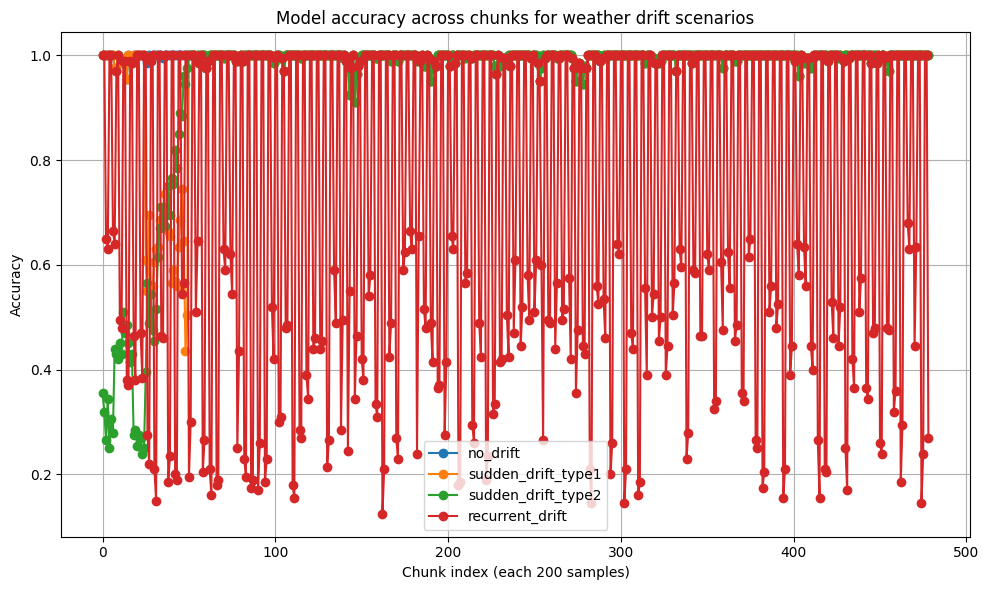

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# ===================================================
# assume these weather drift dataframes already exist:
# df_nodrift, df_sudden_type1, df_sudden_type2, df_recurrent
# ===================================================
datasets = {
    "no_drift": df_nodrift,
    "sudden_drift_type1": df_sudden_type1,
    "sudden_drift_type2": df_sudden_type2,
    "recurrent_drift": df_recurrent,
}

# ===================================================
# define features and target
# ===================================================
features = [
    "Temperature (C)", "Apparent Temperature (C)", "Humidity",
    "Wind Speed (km/h)", "Wind Bearing (degrees)",
    "Visibility (km)", "Cloud Cover", "Pressure (millibars)"
]
target = "Rain"

chunk_size = 200

# ===================================================
# load main weather dataset and train model
# ===================================================
# note: df is your main base dataset (e.g., df_nodrift)
X = df[features].values
y = df[target].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_scaled, y, test_size=0.3, random_state=42
)

# model (same architecture)
model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu',
                      solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)

# ===================================================
# Evaluate trained model on each drift dataset
# ===================================================
plt.figure(figsize=(10, 6))

for name, df_mod in datasets.items():
    X_mod = df_mod[features].values
    y_mod = df_mod[target].values

    # scale using same scaler from training
    X_mod_scaled = scaler.transform(X_mod)

    # predict
    y_pred = model.predict(X_mod_scaled)

    # chunk-wise accuracy
    n_samples = len(X_mod_scaled)
    n_chunks = n_samples // chunk_size
    accs = []

    for i in range(n_chunks):
        start, end = i * chunk_size, (i + 1) * chunk_size
        y_true_chunk = y_mod[start:end]
        y_pred_chunk = y_pred[start:end]
        if len(y_true_chunk) == 0:
            continue
        accs.append(accuracy_score(y_true_chunk, y_pred_chunk))

    plt.plot(range(len(accs)), accs, marker='o', label=name)

# ===================================================
# Plot results
# ===================================================
plt.title("Model accuracy across chunks for weather drift scenarios")
plt.xlabel(f"Chunk index (each {chunk_size} samples)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# === Load your dataset (e.g., weatherHistory 2.csv) ===
df = df_sudden_type1
# === Clean column names ===
df.columns = [col.strip().replace('Loud', 'Cloud') for col in df.columns]
# === Drop missing values ===
df = df.dropna()
# === Split features and target ===
features = [
    "Temperature (C)", "Apparent Temperature (C)", "Humidity",
    "Wind Speed (km/h)", "Wind Bearing (degrees)",
    "Visibility (km)", "Cloud Cover", "Pressure (millibars)"
]
target = "Rain"
X = df[features]
y = df[target]
# === Encode labels (kept for consistency) ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
# === Step 5: Feature Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# === Step 6: Build ANN Model (YOUR MODEL) ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input + 1st hidden layer
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # 2nd hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary)
])
# === Step 7: Compile Model ===
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# === Train Model ===
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
# === Predict ===
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
# === Combine features + true label + predicted label ===
df_results = pd.DataFrame(X_test, columns=features)
df_results["true_class"] = le.inverse_transform(y_test)
df_results["predicted_class"] = le.inverse_transform(y_pred)
# === Save results ===
df_results.to_csv("weather_ann_predictions.csv", index=False)
print("\nPredictions saved to: weather_ann_predictions.csv")
# === Preview ===
print("\nSample predictions:")
print(df_results.head())

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9189 - loss: 0.2311 - val_accuracy: 0.9857 - val_loss: 0.0654
Epoch 2/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9772 - loss: 0.0706 - val_accuracy: 0.9867 - val_loss: 0.0435
Epoch 3/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0520 - val_accuracy: 0.9885 - val_loss: 0.0351
Epoch 4/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9853 - loss: 0.0424 - val_accuracy: 0.9882 - val_loss: 0.0306
Epoch 5/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0394 - val_accuracy: 0.9892 - val_loss: 0.0305
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step

Confusion Matrix:
[[ 4512    69]
 [  249 23951]]

Predictions saved to: weather_ann_predictions.csv

Sample predictions:
   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         0.724778                  0.725133 -0.188851          -0.379355   
1        -5.538658                 -4.117495 -

Surrogate accuracy vs. black-box predictions: 0.9972


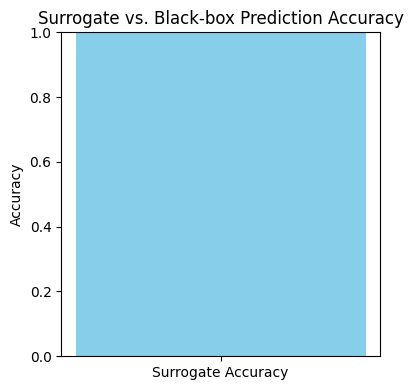

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
# =======================================================
# === SURROGATE MODEL (Decision Tree for explainability)
# =======================================================
X_surrogate = df_results[features].values
# Use numeric labels (since DecisionTreeClassifier requires numeric targets)
y_surrogate = LabelEncoder().fit_transform(df_results["predicted_class"])
# Train surrogate (simple interpretable model)
surrogate_model = DecisionTreeClassifier(max_depth=4, random_state=42)
surrogate_model.fit(X_surrogate, y_surrogate)
# Evaluate surrogate fidelity
y_surrogate_pred = surrogate_model.predict(X_surrogate)
acc = accuracy_score(y_surrogate, y_surrogate_pred)
print(f"Surrogate accuracy vs. black-box predictions: {acc:.4f}")
# =======================================================
# === PLOT 1: Surrogate fidelity bar
# =======================================================
plt.figure(figsize=(4, 4))
plt.bar(['Surrogate Accuracy'], [acc], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Surrogate vs. Black-box Prediction Accuracy')
plt.tight_layout()
plt.show()

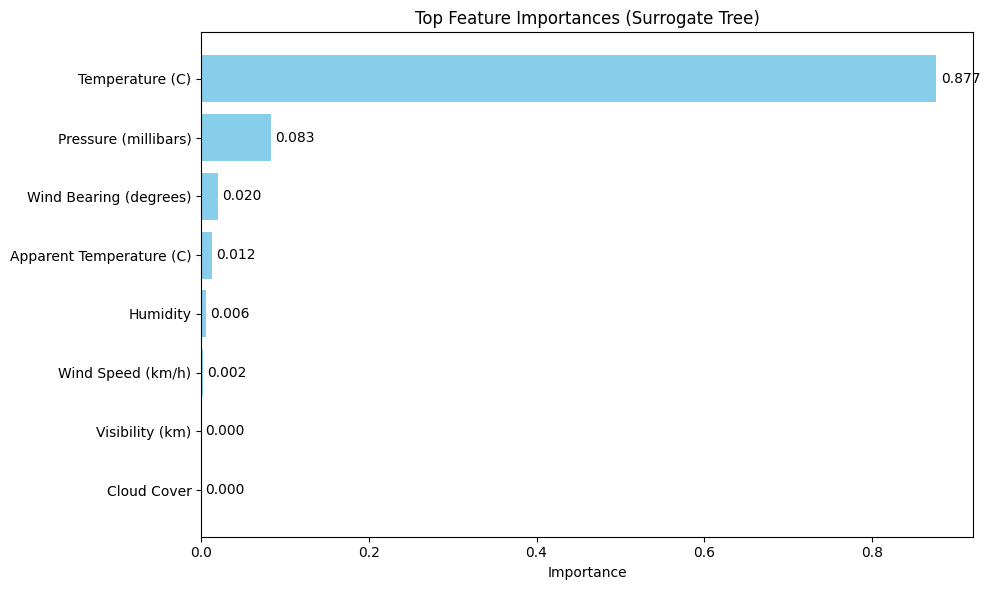

In [12]:
# =======================================================
# === PLOT 2: Top Feature Importances from surrogate
# =======================================================
importances = surrogate_model.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending
top_n = min(10, len(features))
top_indices = indices[:top_n]
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(top_n), top_importances[::-1], color='skyblue')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('Importance')
plt.title('Top Feature Importances (Surrogate Tree)')

# Add numerical values to bars
for i, b in enumerate(bars):
    width = b.get_width()
    plt.text(width + 0.005, b.get_y() + b.get_height()/2,
             f"{top_importances[::-1][i]:.3f}", va='center')

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import numpy as np
# === Get feature importances from the trained surrogate model ===
importances = surrogate_model.feature_importances_
# === Build DataFrame of all features with their importances ===
df_baseline_importance = pd.DataFrame({
    'feature': features,
    'importance': importances
})
# === Sort in descending order ===
df_baseline_importance = df_baseline_importance.sort_values(
    by='importance', ascending=False
).reset_index(drop=True)
# === Select top 10 features ===
df_baseline_top10 = df_baseline_importance.head(10)
# === Display top 10 ===
print(df_baseline_top10)

                    feature  importance
0           Temperature (C)    0.877297
1      Pressure (millibars)    0.083229
2    Wind Bearing (degrees)    0.019600
3  Apparent Temperature (C)    0.012304
4                  Humidity    0.005873
5         Wind Speed (km/h)    0.001698
6           Visibility (km)    0.000000
7               Cloud Cover    0.000000


**Base Statistics**
---

In [14]:
import pandas as pd
# --- Configuration ---
block_size = 50  # Number of samples per block
selected_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Cloud Cover', 'Pressure (millibars)']
# Make a copy of the weather dataset
df_tmp = df.copy()
df_tmp['block'] = df_tmp.index // block_size  # Assign block index
# Check if all columns exist
cols_to_use = [c for c in selected_cols if c in df_tmp.columns]
if len(cols_to_use) < len(selected_cols):
    print("Warning: some selected columns missing and skipped")
# Compute mean, variance, and standard deviation per block
df_baseline_stats = (
    df_tmp
    .groupby('block')[cols_to_use]
    .agg(['mean', 'var', 'std'])
)
# Flatten MultiIndex column names (e.g., nswprice_mean, vicprice_var, etc.)
df_baseline_stats.columns = [
    f"{col}_{stat}" for col, stat in df_baseline_stats.columns
]
# Reset index so 'block' becomes a column
df_baseline_stats = df_baseline_stats.reset_index()
# Save to CSV
df_baseline_stats.to_csv("weather_baseline_stats.csv", index=False)
# Display the resulting DataFrame
df_baseline_stats

,block,Temperature (C)_mean,Temperature (C)_var,Temperature (C)_std,Apparent Temperature (C)_mean,Apparent Temperature (C)_var,Apparent Temperature (C)_std,Humidity_mean,Humidity_var,Humidity_std,...,Wind Bearing (degrees)_std,Visibility (km)_mean,Visibility (km)_var,Visibility (km)_std,Cloud Cover_mean,Cloud Cover_var,Cloud Cover_std,Pressure (millibars)_mean,Pressure (millibars)_var,Pressure (millibars)_std
0,0,13.409111,19.433072,4.408296,12.819444,26.448526,5.142813,0.661400,0.027082,0.164565,...,54.224778,12.191886,7.197329,2.682784,0.0,0.0,0.0,1013.811000,11.033813,3.321718
1,1,9.960556,10.591076,3.254393,8.193889,21.598394,4.647407,0.824000,0.010343,0.101700,...,127.989566,9.639392,13.779371,3.712058,0.0,0.0,0.0,1005.291000,2.140793,1.463145
2,2,9.346667,11.452845,3.384205,8.251778,18.610129,4.313946,0.739800,0.015455,0.124318,...,85.997439,11.475436,7.744153,2.782832,0.0,0.0,0.0,1012.416000,6.677245,2.584037
3,3,13.542000,9.343882,3.056776,13.375444,11.288216,3.359794,0.696200,0.024081,0.155181,...,61.904564,12.140044,5.564921,2.359008,0.0,0.0,0.0,1014.858600,11.382078,3.373733
4,4,14.005444,12.724154,3.567093,13.962889,13.166073,3.628508,0.727600,0.019333,0.139043,...,138.708327,10.929002,10.283672,3.206817,0.0,0.0,0.0,1012.065200,1.059176,1.029163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1914,16.232556,31.700011,5.630276,16.203778,32.169451,5.671812,0.642800,0.044029,0.209830,...,71.412467,15.108884,9.492357,3.080967,0.0,0.0,0.0,1025.368000,11.675363,3.416923
1915,1915,19.127778,36.499531,6.041484,18.934111,34.867483,5.904869,0.643400,0.049292,0.222019,...,108.202133,14.856436,7.071308,2.659193,0.0,0.0,0.0,1018.788000,1.689841,1.299939
1916,1916,19.013556,29.701785,5.449934,18.856444,26.523082,5.150056,0.760200,0.052745,0.229662,...,77.204832,13.480530,9.134743,3.022374,0.0,0.0,0.0,1014.151000,2.872332,1.694795
1917,1917,20.414889,15.109288,3.887067,20.406444,14.971730,3.869332,0.744200,0.030176,0.173712,...,98.779344,14.275870,5.338586,2.310538,0.0,0.0,0.0,1019.536200,2.808440,1.675840


**New Data Statictsics**
---

In [15]:
import pandas as pd

# --- Configuration ---
block_size = 50  # samples per block
selected_cols = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
    'Wind Speed (km/h)', 'Wind Bearing (degrees)',
    'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)'
]

# --- Combine all drift datasets into one ---
df_all = pd.concat(
    [df_sudden_type1, df_sudden_type2, df_recurrent],
    axis=0,
    ignore_index=True
)

# --- Assign block IDs ---
df_all['block'] = df_all.index // block_size

# --- Filter only available columns ---
cols_to_use = [c for c in selected_cols if c in df_all.columns]
if len(cols_to_use) < len(selected_cols):
    print("⚠️ Warning: some selected columns missing and skipped")

# --- Compute mean/variance/std for each block ---
df_all_stats = (
    df_all
    .groupby('block')[cols_to_use]
    .agg(['mean', 'var', 'std'])
)

# --- Flatten multi-level column names ---
df_all_stats.columns = [f"{col}_{stat}" for col, stat in df_all_stats.columns]

# --- Reset index so 'block' becomes a column ---
df_all_stats = df_all_stats.reset_index()

# --- Save results ---
df_all_stats.to_csv("weather_all_drift_stats.csv", index=False)
print("✅ Combined drift statistics saved to weather_all_drift_stats.csv")

# --- Display preview of computed statistics ---
df_all_stats.head()


✅ Combined drift statistics saved to weather_all_drift_stats.csv


,block,Temperature (C)_mean,Temperature (C)_var,Temperature (C)_std,Apparent Temperature (C)_mean,Apparent Temperature (C)_var,Apparent Temperature (C)_std,Humidity_mean,Humidity_var,Humidity_std,...,Wind Bearing (degrees)_std,Visibility (km)_mean,Visibility (km)_var,Visibility (km)_std,Cloud Cover_mean,Cloud Cover_var,Cloud Cover_std,Pressure (millibars)_mean,Pressure (millibars)_var,Pressure (millibars)_std
0,0,13.409111,19.433072,4.408296,12.819444,26.448526,5.142813,0.6614,0.027082,0.164565,...,54.224778,12.191886,7.197329,2.682784,0.0,0.0,0.0,1013.8110,11.033813,3.321718
1,1,9.960556,10.591076,3.254393,8.193889,21.598394,4.647407,0.8240,0.010343,0.101700,...,127.989566,9.639392,13.779371,3.712058,0.0,0.0,0.0,1005.2910,2.140793,1.463145
2,2,9.346667,11.452845,3.384205,8.251778,18.610129,4.313946,0.7398,0.015455,0.124318,...,85.997439,11.475436,7.744153,2.782832,0.0,0.0,0.0,1012.4160,6.677245,2.584037
3,3,13.542000,9.343882,3.056776,13.375444,11.288216,3.359794,0.6962,0.024081,0.155181,...,61.904564,12.140044,5.564921,2.359008,0.0,0.0,0.0,1014.8586,11.382078,3.373733
4,4,14.005444,12.724154,3.567093,13.962889,13.166073,3.628508,0.7276,0.019333,0.139043,...,138.708327,10.929002,10.283672,3.206817,0.0,0.0,0.0,1012.0652,1.059176,1.029163


In [16]:
import pandas as pd
import numpy as np

# ============================================================
# Load pre-computed statistics for weather dataset
# ============================================================
df_baseline = pd.read_csv("weather_baseline_stats.csv")
df_drifted = pd.read_csv("weather_all_drift_stats.csv")

# ============================================================
# Baseline reference vector: mean across all baseline blocks
# ============================================================
baseline_row = df_baseline.mean()

# ============================================================
# Collect all columns except 'block'
# ============================================================
cols = [c for c in df_baseline.columns if c != 'block']

# Identify base features (remove suffix like _mean/_var/_std)
base_features = sorted(set(col.rsplit('_', 1)[0] for col in cols))

records = []

# ============================================================
# Compute Fréchet-like distances block-wise
# ============================================================
for idx, drift_row in df_drifted.iterrows():
    block_id = drift_row.get("block", idx)
    row_result = {"block": block_id}

    for base in base_features:
        # Extract baseline mean and std
        mean_b = float(baseline_row.get(f"{base}_mean", np.nan))
        std_b = float(baseline_row.get(f"{base}_std", np.sqrt(abs(baseline_row.get(f"{base}_var", 0)))))

        # Extract drifted mean and std for current block
        mean_n = float(drift_row.get(f"{base}_mean", np.nan))
        std_n = float(drift_row.get(f"{base}_std", np.sqrt(abs(drift_row.get(f"{base}_var", 0)))))

        # Fréchet distance in 1D (between baseline & drift block)
        d = np.sqrt((mean_b - mean_n)**2 + (std_b - std_n)**2)
        row_result[base] = d

    records.append(row_result)

# ============================================================
# Build DataFrame of Fréchet distances
# ============================================================
df_frechet_vector = pd.DataFrame(records)

# ============================================================
# Save results
# ============================================================
df_frechet_vector.to_csv("weather_frechet_vector.csv", index=False)
print("✅ Fréchet distance vector saved to weather_frechet_vector.csv")

# Preview
print(df_frechet_vector.head())


✅ Fréchet distance vector saved to weather_frechet_vector.csv
   block  Apparent Temperature (C)  Cloud Cover  Humidity  \
0    0.0                  4.038154          0.0  0.041629   
1    1.0                  1.980845          0.0  0.153233   
2    2.0                  2.269652          0.0  0.075987   
3    3.0                  5.359617          0.0  0.031639   
4    4.0                  5.711232          0.0  0.056961   

   Pressure (millibars)  Temperature (C)  Visibility (km)  \
0             75.697547         3.435900         2.704611   
1             80.453390         2.658075         0.068334   
2             76.838421         2.683769         2.006291   
3             75.330401         4.298548         2.790377   
4             78.423463         4.365573         1.338403   

   Wind Bearing (degrees)  Wind Speed (km/h)  
0               57.671899           3.079831  
1               30.358885           5.838178  
2               27.336866           1.314546  
3               

In [17]:
df_baseline_top10

,feature,importance
0,Temperature (C),0.877297
1,Pressure (millibars),0.083229
2,Wind Bearing (degrees),0.019600
3,Apparent Temperature (C),0.012304
4,Humidity,0.005873
5,Wind Speed (km/h),0.001698
6,Visibility (km),0.000000
7,Cloud Cover,0.000000


In [18]:
import pandas as pd

# ============================================================
# Load supporting data (already created previously)
# ============================================================
# df_frechet_vector → Fréchet distance results from weather_frechet_vector.csv
# df_baseline_top10 → Top 10 surrogate feature importances

# If needed to reload from files:
# df_frechet_vector = pd.read_csv("weather_frechet_vector.csv")
# df_baseline_top10 = pd.read_csv("weather_baseline_top10.csv")

# ============================================================
# Convert top-10 importance DataFrame into dictionary
# ============================================================
importance_dict = dict(zip(df_baseline_top10['feature'], df_baseline_top10['importance']))

# Make a working copy of the Fréchet distance vector
df_drift_exposure = df_frechet_vector.copy()

# ============================================================
# Compute Weather Drift Exposure Score (DES) per block
# ============================================================
des_values = []

for idx, row in df_drift_exposure.iterrows():
    des_total = 0.0
    for feature_name, importance in importance_dict.items():
        # Match all feature columns corresponding to this base feature
        matching_cols = [c for c in df_drift_exposure.columns if c.startswith(feature_name)]
        for col in matching_cols:
            des_total += importance * row[col]
    des_values.append(des_total)

# Store the DES value for each block
df_drift_exposure['DES'] = des_values

# ============================================================
# Save the Weather Drift Exposure Score results
# ============================================================
df_drift_exposure.to_csv("weather_drift_exposure_scores.csv", index=False)

print("✅ Weather Drift Exposure Scores computed and saved to weather_drift_exposure_scores.csv")

# Display preview
print(df_drift_exposure[['block', 'DES']].head())


✅ Weather Drift Exposure Scores computed and saved to weather_drift_exposure_scores.csv
   block        DES
0    0.0  10.500029
1    1.0   9.658168
2    2.0   9.316029
3    3.0  11.194872
4    4.0  11.256387


In [19]:
df_drift_exposure

,block,Apparent Temperature (C),Cloud Cover,Humidity,Pressure (millibars),Temperature (C),Visibility (km),Wind Bearing (degrees),Wind Speed (km/h),DES
0,0.0,4.038154,0.0,0.041629,75.697547,3.435900,2.704611,57.671899,3.079831,10.500029
1,1.0,1.980845,0.0,0.153233,80.453390,2.658075,0.068334,30.358885,5.838178,9.658168
2,2.0,2.269652,0.0,0.075987,76.838421,2.683769,2.006291,27.336866,1.314546,9.316029
3,3.0,5.359617,0.0,0.031639,75.330401,4.298548,2.790377,55.334931,2.022675,11.194872
4,4.0,5.711232,0.0,0.056961,78.423463,4.365573,1.338403,42.047072,2.755892,11.256387
...,...,...,...,...,...,...,...,...,...,...
5752,5752.0,42.626775,0.0,1.542969,62.792782,50.969075,15.758384,1023.270813,36.988179,70.593273
5753,5753.0,25.089683,0.0,1.753890,70.639615,48.371531,16.495001,834.183074,32.013380,65.038502
5754,5754.0,39.842219,0.0,1.921974,63.958436,48.480187,14.474260,943.008055,27.833084,66.886096
5755,5755.0,35.368813,0.0,1.565237,65.762292,52.489478,13.377873,811.716556,38.070773,67.940547


<Axes: >

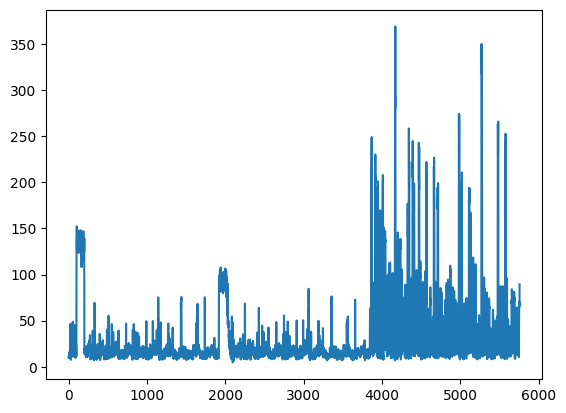

In [20]:
df_drift_exposure["DES"].plot()

In [21]:
import pandas as pd
import numpy as np

# ============================================================
# Load MLS Drift Exposure Scores (if not already in memory)
# ============================================================
# df_drift_exposure = pd.read_csv("electricity_drift_exposure_scores.csv")
# ============================================================
# Configuration
# ============================================================
block_group_size = 5    # Number of blocks per group
threshold_scaled = 0.1 # Scaled drift threshold (0–1 range)

# ============================================================
# Step 1: Assign group IDs (every 5 blocks form a group)
# ============================================================
df_drift_exposure["block_group"] = (df_drift_exposure["block"] // block_group_size).astype(int)

# ============================================================
# Step 2: Aggregate by group — compute average DES per block group
# ============================================================
group_results = []
for group_id, subset in df_drift_exposure.groupby("block_group"):
    avg_des = subset["DES"].mean()
    group_results.append({
        "block_range": f"{subset['block'].min():.0f}-{subset['block'].max():.0f}",
        "total_blocks": len(subset),
        "avg_DES": avg_des
    })

df_summary = pd.DataFrame(group_results)

# ============================================================
# Step 3: Scale avg_DES into [0, 1] range for comparison
# ============================================================
min_val = df_summary["avg_DES"].min()
max_val = df_summary["avg_DES"].max()
df_summary["avg_DES_scaled"] = (df_summary["avg_DES"] - min_val) / (max_val - min_val)

# ============================================================
# Step 4: Determine drift type based on scaled DES threshold
# ============================================================
df_summary["final_drift"] = np.where(
    df_summary["avg_DES_scaled"] > threshold_scaled,
    "REAL_DRIFT",
    "PSEUDO_DRIFT"
)

# ============================================================
# Save and display
# ============================================================
df_summary.to_csv("electricity_drift_summary.csv", index=False)

print("✅ Drift summary saved to electricity_drift_summary.csv")
print(df_summary)


✅ Drift summary saved to electricity_drift_summary.csv
     block_range  total_blocks    avg_DES  avg_DES_scaled   final_drift
0            0-4             5  10.385097        0.009458  PSEUDO_DRIFT
1            5-9             5  12.647892        0.016404  PSEUDO_DRIFT
2          10-14             5  11.039805        0.011468  PSEUDO_DRIFT
3          15-19             5  19.783235        0.038309  PSEUDO_DRIFT
4          20-24             5  33.045402        0.079024  PSEUDO_DRIFT
...          ...           ...        ...             ...           ...
1147   5735-5739             5  46.438660        0.120140    REAL_DRIFT
1148   5740-5744             5  25.466179        0.055756  PSEUDO_DRIFT
1149   5745-5749             5  20.752149        0.041284  PSEUDO_DRIFT
1150   5750-5754             5  66.847168        0.182794    REAL_DRIFT
1151   5755-5756             2  78.643966        0.219009    REAL_DRIFT

[1152 rows x 5 columns]


<Axes: >

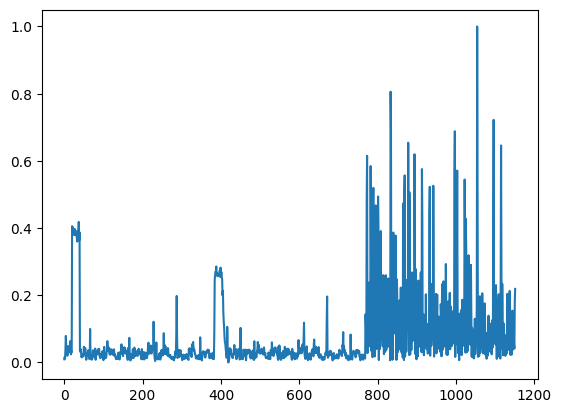

In [22]:
df_summary['avg_DES_scaled'].plot()

In [23]:
df_summary['final_drift'].value_counts()

,count
final_drift,
PSEUDO_DRIFT,896
REAL_DRIFT,256


In [24]:
df_all

,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type,block
0,0.000000,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.0,1015.130000,1,sudden_type1,0
1,1.000000,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.0,1015.630000,1,sudden_type1,0
2,2.000000,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.0,1015.940000,1,sudden_type1,0
3,3.000000,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.0,1016.410000,1,sudden_type1,0
4,4.000000,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.0,1016.510000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
287803,96989.843603,71.054046,-11.993603,1.188583,-39.579661,995.843137,-10.659012,0.0,943.223923,0,recurrent,5756
287804,97134.897290,128.908824,4.067313,-0.541777,-0.508416,1203.624739,-2.834831,0.0,964.107924,0,recurrent,5756
287805,96414.990195,74.376323,-21.310109,2.489654,-30.233793,812.639806,9.637774,0.0,1005.043911,0,recurrent,5756
287806,97036.439084,63.250709,-28.784773,1.394917,-24.039963,692.365787,-13.418267,0.0,974.309255,0,recurrent,5756


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# ============================================================
# Configuration
# ============================================================
features = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
    'Wind Speed (km/h)', 'Wind Bearing (degrees)',
    'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)'
]
target = "Rain"
block_window = 5  # evaluate every 5 consecutive blocks

# ============================================================
# Input DataFrame (combined drift dataset)
# ============================================================
df_tmp = df_all.copy()  # df_all is your combined drift dataset
df_tmp = df_tmp.sort_values(by="block").reset_index(drop=True)

# ============================================================
# Encode target labels
# ============================================================
le = LabelEncoder()
df_tmp[target] = le.fit_transform(df_tmp[target])  # Rain/No Rain → 1/0

# ============================================================
# Evaluate model performance per 5-block chunk
# ============================================================
accuracies = []
block_ids = sorted(df_tmp["block"].unique())

for i in range(0, len(block_ids), block_window):
    block_chunk = block_ids[i:i + block_window]
    df_chunk = df_tmp[df_tmp["block"].isin(block_chunk)]
    if df_chunk.empty:
        continue

    # Prepare feature and label arrays
    X_chunk = df_chunk[features].values
    y_chunk = df_chunk[target].values

    # Scale using the same fitted scaler used during training
    X_chunk_scaled = scaler.transform(pd.DataFrame(X_chunk, columns=features))

    # Predict with Keras model
    y_pred_prob = model.predict(X_chunk_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Compute accuracy manually
    accuracy = accuracy_score(y_chunk, y_pred)

    accuracies.append({
        "block_range": f"{block_chunk[0]}-{block_chunk[-1]}",
        "total_blocks": len(block_chunk),
        "accuracy": accuracy
    })

# ============================================================
# Build summary DataFrame
# ============================================================
df_accuracies = pd.DataFrame(accuracies)

# Save for later drift comparison (ground truth)
df_accuracies.to_csv("weather_blockwise_accuracies.csv", index=False)

print("✅ Block-wise accuracy ground truth saved to weather_blockwise_accuracies.csv")
print(df_accuracies.head())


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━

In [26]:
df_accuracies

,block_range,total_blocks,accuracy
0,0-4,5,1.00000
1,5-9,5,1.00000
2,10-14,5,1.00000
3,15-19,5,1.00000
4,20-24,5,1.00000
...,...,...,...
1147,5735-5739,5,0.82000
1148,5740-5744,5,0.94800
1149,5745-5749,5,0.98400
1150,5750-5754,5,0.82400


In [27]:
import numpy as np
# Assume df is your dataframe with 'accuracy'
df_accuracies["Ground truth"] = np.where(df_accuracies["accuracy"] > 0.90, "PSEUDO_DRIFT", "REAL_DRIFT")
df_accuracies

,block_range,total_blocks,accuracy,Ground truth
0,0-4,5,1.00000,PSEUDO_DRIFT
1,5-9,5,1.00000,PSEUDO_DRIFT
2,10-14,5,1.00000,PSEUDO_DRIFT
3,15-19,5,1.00000,PSEUDO_DRIFT
4,20-24,5,1.00000,PSEUDO_DRIFT
...,...,...,...,...
1147,5735-5739,5,0.82000,REAL_DRIFT
1148,5740-5744,5,0.94800,PSEUDO_DRIFT
1149,5745-5749,5,0.98400,PSEUDO_DRIFT
1150,5750-5754,5,0.82400,REAL_DRIFT


<Axes: >

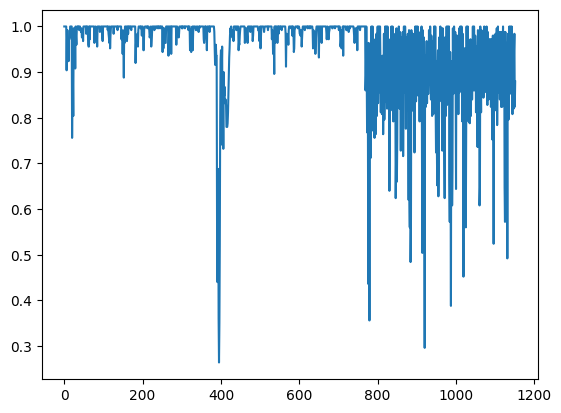

In [28]:
df_accuracies["accuracy"].plot()

In [29]:
df_accuracies['Ground truth'].value_counts()

,count
Ground truth,
PSEUDO_DRIFT,913
REAL_DRIFT,239


In [30]:
df_summary["final_drift"].value_counts()

,count
final_drift,
PSEUDO_DRIFT,896
REAL_DRIFT,256


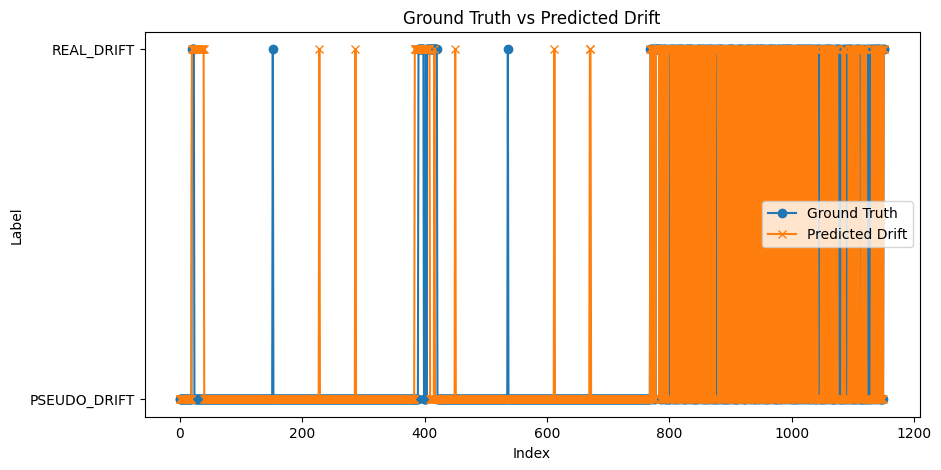

In [31]:
import matplotlib.pyplot as plt
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
plt.figure(figsize=(10,5))
plt.plot(y_true.values, label="Ground Truth", marker='o')
plt.plot(y_pred.values, label="Predicted Drift", marker='x')
plt.xlabel("Index")
plt.ylabel("Label")
plt.title("Ground Truth vs Predicted Drift")
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.9053819444444444
F1 Score: 0.9065621143720232
Precision: 0.9082559252542163
Recall: 0.9053819444444444
Confusion Matrix:
 [[850  63]
 [ 46 193]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.95      0.93      0.94       913
  REAL_DRIFT       0.75      0.81      0.78       239

    accuracy                           0.91      1152
   macro avg       0.85      0.87      0.86      1152
weighted avg       0.91      0.91      0.91      1152



In [34]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df_all.to_csv("/content/drive/My Drive/Early Drift Detection/Drifted_wed_data.csv", index=False)

Mounted at /content/drive


**ADWIN Weather**
---

In [35]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# Define the paths to your datasets in Google Drive
import numpy as np
df_all=pd.read_csv("/content/drive/My Drive/Early Drift Detection/Drifted_wed_data.csv")
df_all

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type,block
0,0.000000,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.0,1015.130000,1,sudden_type1,0
1,1.000000,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.0,1015.630000,1,sudden_type1,0
2,2.000000,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.0,1015.940000,1,sudden_type1,0
3,3.000000,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.0,1016.410000,1,sudden_type1,0
4,4.000000,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.0,1016.510000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
287803,96989.843603,71.054046,-11.993603,1.188583,-39.579661,995.843137,-10.659012,0.0,943.223923,0,recurrent,5756
287804,97134.897290,128.908824,4.067313,-0.541777,-0.508416,1203.624739,-2.834831,0.0,964.107924,0,recurrent,5756
287805,96414.990195,74.376323,-21.310109,2.489654,-30.233793,812.639806,9.637774,0.0,1005.043911,0,recurrent,5756
287806,97036.439084,63.250709,-28.784773,1.394917,-24.039963,692.365787,-13.418267,0.0,974.309255,0,recurrent,5756


In [41]:
import numpy as np
import pandas as pd

# ==========================================================
# VARIANCE-AWARE ADWIN DRIFT DETECTOR
# ==========================================================
def adwin_detector_single_feature(data_stream, delta=0.002, min_window=10):
    """
    ADWIN for single feature — variance-aware.
    Returns drift scores (0–1) combining mean + variance shift effects.
    """
    window = []
    drift_scores = np.zeros(len(data_stream))

    for i, value in enumerate(data_stream):
        window.append(value)

        if len(window) < min_window:
            continue

        n = len(window)
        split_points = [int(0.3 * n), int(0.5 * n), int(0.7 * n)]
        max_drift_score = 0

        for split_point in split_points:
            if split_point < 5 or (n - split_point) < 5:
                continue

            w0 = np.array(window[:split_point])
            w1 = np.array(window[split_point:])

            n0, n1 = len(w0), len(w1)
            m = 1.0 / (1.0 / n0 + 1.0 / n1)

            mean0, mean1 = np.mean(w0), np.mean(w1)
            var0, var1 = np.var(w0), np.var(w1)

            pooled_var = ((n0 - 1) * var0 + (n1 - 1) * var1) / max((n0 + n1 - 2), 1)
            δ_prime = max(delta / n, 1e-12)
            log_term = np.log(2.0 / δ_prime)

            eps_var = np.sqrt((2.0 / m) * pooled_var * log_term) + (2.0 / (3.0 * m)) * log_term

            # components
            mean_diff = abs(mean0 - mean1)
            var_diff = abs(np.sqrt(var0 + 1e-12) - np.sqrt(var1 + 1e-12))

            drift_mag = np.sqrt(mean_diff**2 + var_diff**2)

            drift_score = min(1.0, drift_mag / (eps_var + 1e-8))
            max_drift_score = max(max_drift_score, drift_score)

            # adaptive window shrink
            if drift_score > 0.7:
                window = w1.tolist()
                break

        drift_scores[i] = max_drift_score

        # rolling window control
        if len(window) > 50:
            window = window[-25:]

    return drift_scores


def _minmax_scale_dict(value_dict):
    """Scale dict values to [0,1] with min–max; handle degenerate case."""
    vals = np.array(list(value_dict.values()), dtype=float)
    vmin, vmax = float(np.min(vals)), float(np.max(vals))
    denom = vmax - vmin
    if denom <= 1e-12:
        return {k: 0.0 for k in value_dict}  # all equal
    return {k: (v - vmin) / denom for k, v in value_dict.items()}


# ==================== BLOCKWISE COMBINATION (ADWIN ONLY) ====================
def combine_adwin_drift_scores_blockwise(
    df,
    adwin_scores_dict,
    adwin_threshold=0.6,
    block_size=5,
    use_scaled_threshold=True,
):
    """
    Combine ADWIN drift scores from all features using block averages.
    1) Compute raw block means of ADWIN scores (per block, across features)
    2) Min–max scale block means to [0,1]
    3) Classify each block using the SCALED mean vs adwin_threshold (if use_scaled_threshold=True)
    """
    df = df.copy()
    if "block" not in df.columns:
        raise KeyError("Input DataFrame must contain a 'block' column.")

    df["block_group"] = (df["block"] // block_size).astype(int)

    adwin_block_means = {}

    # First pass: compute raw block means
    for group_id, group_df in df.groupby("block_group"):
        idx = group_df.index
        # mean over features, each feature mean over indices in this block
        per_feature_means = [np.mean(adwin_scores_dict[col][idx]) for col in adwin_scores_dict]
        adwin_block_means[group_id] = float(np.mean(per_feature_means))

    # Second pass: scale raw means to [0,1]
    adwin_block_means_scaled = _minmax_scale_dict(adwin_block_means)

    # Choose which value to compare to threshold
    if use_scaled_threshold:
        label_source = adwin_block_means_scaled
        print("\n=== BLOCK-WISE ADWIN MEAN SCORES (scaled to [0,1]) ===")
    else:
        label_source = adwin_block_means
        print("\n=== BLOCK-WISE ADWIN MEAN SCORES (raw) ===")

    adwin_block_labels = {}
    for gid in sorted(adwin_block_means.keys()):
        raw_mean = adwin_block_means[gid]
        scaled_mean = adwin_block_means_scaled[gid]
        score_for_threshold = label_source[gid]

        label = "REAL_DRIFT" if score_for_threshold > adwin_threshold else "PSEUDO_DRIFT"
        adwin_block_labels[gid] = label

        print(
            f"Block {gid:3d}: Raw={raw_mean:.4f}  Scaled={scaled_mean:.4f}  "
            f"→ Using {'Scaled' if use_scaled_threshold else 'Raw'}={score_for_threshold:.4f}  → {label}"
        )

    # Map results to dataframe
    df["ADWIN_score_mean"] = df["block_group"].map(adwin_block_means)
    df["ADWIN_score_mean_scaled"] = df["block_group"].map(adwin_block_means_scaled)
    df["ADWIN_drift"] = df["block_group"].map(adwin_block_labels)

    return df


# ==================== MAIN FUNCTION ====================
def detect_adwin_drift_all_columns(
    df,
    feature_columns=None,
    adwin_threshold=0.6,
    block_size=5,
    use_scaled_threshold=True,
):
    """
    Detect ADWIN drift on all specified columns with block averaging.
    Block means are min–max scaled to [0,1] and the scaled scores are used for thresholding by default.
    """
    if feature_columns is None:
        exclude_cols = ['activity', 'drift_type', 'block']
        feature_columns = [
            col for col in df.columns
            if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])
        ]

    print(f"Processing {len(feature_columns)} features: {feature_columns}")

    adwin_scores_dict = {}
    for col in feature_columns:
        print(f"Calculating ADWIN drift scores for {col}...")
        data = df[col].values
        adwin_scores_dict[col] = adwin_detector_single_feature(data)

    print("\nCombining ADWIN drift scores block-wise (with scaling)...")
    result_df = combine_adwin_drift_scores_blockwise(
        df.copy(),
        adwin_scores_dict,
        adwin_threshold=adwin_threshold,
        block_size=block_size,
        use_scaled_threshold=use_scaled_threshold,
    )

    adwin_real = (result_df['ADWIN_drift'] == 'REAL_DRIFT').sum()
    adwin_pseudo = (result_df['ADWIN_drift'] == 'PSEUDO_DRIFT').sum()

    print(f"\n=== ADWIN DRIFT DETECTION SUMMARY ===")
    print(f"REAL_DRIFT blocks: {adwin_real}")
    print(f"PSEUDO_DRIFT blocks: {adwin_pseudo}")
    print(f"Total blocks: {result_df['block_group'].nunique()}")

    return result_df


# ==================== SIMPLE USAGE ====================
def run_adwin_drift_detection(
    df_all,
    adwin_threshold=0.20,
    block_size=5,
    use_scaled_threshold=True,
):
    return detect_adwin_drift_all_columns(
        df_all,
        adwin_threshold=adwin_threshold,
        block_size=block_size,
        use_scaled_threshold=use_scaled_threshold,
    )

In [42]:
df_all.columns

Index(['Unnamed: 0', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Cloud Cover', 'Pressure (millibars)', 'Rain', 'drift_type', 'block'],
      dtype='object')

In [60]:
# ==================== RUN ADWIN DRIFT DETECTION ====================
result = detect_adwin_drift_all_columns(
    df_all,
    feature_columns=[
        'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
        'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
        'Cloud Cover', 'Pressure (millibars)'
    ],
    adwin_threshold=0.60,  # threshold applied on scaled mean by default
    block_size=5,
    use_scaled_threshold=True  # ensures scaled values are used
)

# ==================== ANALYZE RESULTS ====================
print("\n--- Drift Counts ---")
print(result['ADWIN_drift'].value_counts())

# Inspect both raw and scaled block mean scores
print("\n--- Block Mean and Scaled Scores ---")
print(
    result[['block_group', 'ADWIN_score_mean', 'ADWIN_score_mean_scaled', 'ADWIN_drift']]
    .drop_duplicates()
    .head(20)
)

# ==================== SAVE RESULTS ====================
result.to_csv('adwin_drift_detection_results.csv', index=False)


Processing 8 features: ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']
Calculating ADWIN drift scores for Temperature (C)...
Calculating ADWIN drift scores for Apparent Temperature (C)...
Calculating ADWIN drift scores for Humidity...
Calculating ADWIN drift scores for Wind Speed (km/h)...
Calculating ADWIN drift scores for Wind Bearing (degrees)...
Calculating ADWIN drift scores for Visibility (km)...
Calculating ADWIN drift scores for Cloud Cover...
Calculating ADWIN drift scores for Pressure (millibars)...

Combining ADWIN drift scores block-wise (with scaling)...

=== BLOCK-WISE ADWIN MEAN SCORES (scaled to [0,1]) ===
Block   0: Raw=0.2831  Scaled=0.4535  → Using Scaled=0.4535  → PSEUDO_DRIFT
Block   1: Raw=0.2768  Scaled=0.4025  → Using Scaled=0.4025  → PSEUDO_DRIFT
Block   2: Raw=0.2996  Scaled=0.5870  → Using Scaled=0.5870  → PSEUDO_DRIFT
Block   3: Raw=0.2891  Sc

<Axes: >

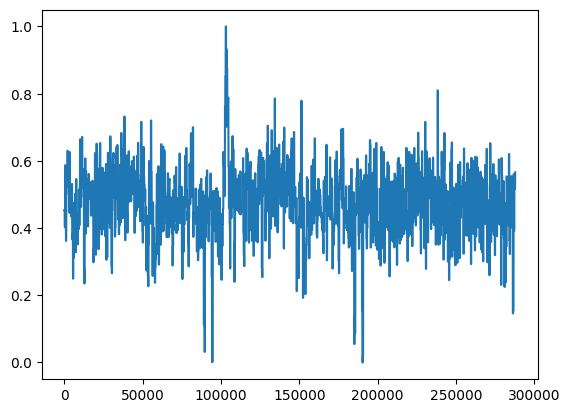

In [61]:
result['ADWIN_score_mean_scaled'].plot()

In [62]:
result['ADWIN_drift'].value_counts()

,count
ADWIN_drift,
PSEUDO_DRIFT,257308
REAL_DRIFT,30500


In [63]:
def majority_drift(series):
    counts = series.value_counts()
    return counts.idxmax() if not counts.empty else "NO_DATA"
# Step 3: Aggregate per block_group
agg_results = result.groupby("block_group").agg({
    "ADWIN_drift": majority_drift
}).reset_index()
# Step 4: Add block range string
agg_results["block_range"] = agg_results["block_group"].apply(lambda g: f"{g*5}-{g*5+4}")
agg_results

,block_group,ADWIN_drift,block_range
0,0,PSEUDO_DRIFT,0-4
1,1,PSEUDO_DRIFT,5-9
2,2,PSEUDO_DRIFT,10-14
3,3,PSEUDO_DRIFT,15-19
4,4,PSEUDO_DRIFT,20-24
...,...,...,...
1147,1147,PSEUDO_DRIFT,5735-5739
1148,1148,PSEUDO_DRIFT,5740-5744
1149,1149,PSEUDO_DRIFT,5745-5749
1150,1150,PSEUDO_DRIFT,5750-5754


In [64]:
df_accuracies = pd.read_csv("/content/weather_blockwise_accuracies.csv")
df_accuracies["Ground truth"] = np.where(df_accuracies["accuracy"] > 0.80, "PSEUDO_DRIFT", "REAL_DRIFT")
df_accuracies

,block_range,total_blocks,accuracy,Ground truth
0,0-4,5,1.00000,PSEUDO_DRIFT
1,5-9,5,1.00000,PSEUDO_DRIFT
2,10-14,5,1.00000,PSEUDO_DRIFT
3,15-19,5,1.00000,PSEUDO_DRIFT
4,20-24,5,1.00000,PSEUDO_DRIFT
...,...,...,...,...
1147,5735-5739,5,0.82000,REAL_DRIFT
1148,5740-5744,5,0.94800,PSEUDO_DRIFT
1149,5745-5749,5,0.98400,PSEUDO_DRIFT
1150,5750-5754,5,0.82400,REAL_DRIFT


In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = agg_results["ADWIN_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.7282986111111112
F1 Score: 0.692449845904524
Precision: 0.6679155586282208
Recall: 0.7282986111111112
Confusion Matrix:
 [[815  98]
 [215  24]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.79      0.89      0.84       913
  REAL_DRIFT       0.20      0.10      0.13       239

    accuracy                           0.73      1152
   macro avg       0.49      0.50      0.49      1152
weighted avg       0.67      0.73      0.69      1152



***MMD DETECTOR WEATHER***
---

In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ==================== MMD DETECTOR (SINGLE FEATURE) ====================
def mmd_detector_single_feature(data_stream, window_size=20):
    """
    MMD for single feature - returns drift scores (0-1)
    """
    def rbf_kernel(x, y, sigma=1.0):
        x = np.array(x).reshape(-1, 1)
        y = np.array(y).reshape(-1, 1)
        dist_sq = np.sum(x**2, axis=1, keepdims=True) + np.sum(y**2, axis=1) - 2 * (x @ y.T)
        return np.exp(-dist_sq / (2 * sigma**2))

    reference = []
    current = []
    drift_scores = np.zeros(len(data_stream))

    for i, value in enumerate(data_stream):
        current.append(value)

        if len(current) > window_size:
            current = current[-window_size:]

        if len(reference) < window_size:
            reference.append(value)
            continue

        # Compute kernel matrices
        K_ref = rbf_kernel(reference, reference)
        K_curr = rbf_kernel(current, current)
        K_cross = rbf_kernel(reference, current)

        m, n = len(reference), len(current)

        mmd_sq = (np.sum(K_ref) - np.trace(K_ref)) / (m*(m-1)) + \
                 (np.sum(K_curr) - np.trace(K_curr)) / (n*(n-1)) - \
                 2 * np.mean(K_cross)

        mmd_sq = max(0, mmd_sq)
        drift_score = min(1.0, mmd_sq * 10)
        drift_scores[i] = drift_score

        # Update reference window when strong drift detected
        if drift_score > 0.8:
            reference = current.copy()

    return drift_scores


# ==================== COMBINE MMD DRIFT SCORES BLOCKWISE ====================
def combine_mmd_drift_scores_blockwise(df, mmd_scores_dict, mmd_threshold=0.7, block_size=5):
    """
    Combine MMD drift scores from all features using block averages (scaled 0–1).
    """
    df["block_group"] = (df["block"] // block_size).astype(int)
    mmd_block_means = []

    # Compute average drift score per block across all features
    for group_id, group_df in df.groupby("block_group"):
        idx = group_df.index
        mean_score = np.mean([np.mean(mmd_scores_dict[col][idx]) for col in mmd_scores_dict])
        mmd_block_means.append((group_id, mean_score))

    # Convert to DataFrame for scaling
    mmd_block_df = pd.DataFrame(mmd_block_means, columns=["block_group", "MMD_score_mean"])

    # --- Scale block means between 0 and 1 ---
    scaler = MinMaxScaler()
    mmd_block_df["MMD_score_mean_scaled"] = scaler.fit_transform(
        mmd_block_df[["MMD_score_mean"]]
    )

    # --- Classify scaled means ---
    mmd_block_df["MMD_drift"] = np.where(
        mmd_block_df["MMD_score_mean_scaled"] > mmd_threshold,
        "real_drift",
        "pseudo_drift"
    )

    # Merge results back into original DataFrame
    df = df.merge(mmd_block_df, on="block_group", how="left")

    return df


# ==================== MAIN FUNCTION ====================
def detect_mmd_drift_all_columns(df, feature_columns=None, mmd_threshold=0.7, block_size=5):
    """
    Detect drift on all numeric columns using MMD-based scoring.
    """
    if feature_columns is None:
        exclude_cols = ['activity', 'drift_type', 'block']
        feature_columns = [col for col in df.columns if col not in exclude_cols and
                          pd.api.types.is_numeric_dtype(df[col])]

    print(f"Processing {len(feature_columns)} features: {feature_columns}")

    mmd_scores_dict = {}

    for col in feature_columns:
        print(f"Calculating MMD drift scores for {col}...")
        data = df[col].values
        mmd_scores_dict[col] = mmd_detector_single_feature(data)

    print("Combining MMD drift scores block-wise...")
    result_df = combine_mmd_drift_scores_blockwise(df.copy(), mmd_scores_dict,
                                                   mmd_threshold, block_size)

    # Summary
    mmd_real = (result_df['MMD_drift'] == 'real_drift').sum()
    mmd_pseudo = (result_df['MMD_drift'] == 'pseudo_drift').sum()

    print("\n=== MMD DRIFT DETECTION SUMMARY ===")
    print(f"Real drifts: {mmd_real}")
    print(f"Pseudo drifts: {mmd_pseudo}")
    print(f"Total blocks: {result_df['block_group'].nunique()}")

    return result_df


# ==================== SIMPLE USAGE ====================
def run_mmd_drift_detection(df):
    return detect_mmd_drift_all_columns(df)


In [101]:
# ==================== RUN MMD DRIFT DETECTION ====================
result = detect_mmd_drift_all_columns(
    df_all,
    feature_columns=[
        'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
        'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
        'Cloud Cover', 'Pressure (millibars)'
    ],
    mmd_threshold=0.60,  # threshold is applied on the *scaled* [0,1] means
    block_size=5
)
# ==================== ANALYZE RESULTS ====================
print("\n--- Drift Counts ---")
print(result['MMD_drift'].value_counts())

# Show one row per block with both raw and scaled means
block_summary = (
    result[['block_group', 'MMD_score_mean', 'MMD_score_mean_scaled', 'MMD_drift']]
    .drop_duplicates()
    .sort_values('block_group')
)
print("\n--- Block Means (raw & scaled) ---")
print(block_summary.head(20))

Processing 8 features: ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']
Calculating MMD drift scores for Temperature (C)...
Calculating MMD drift scores for Apparent Temperature (C)...
Calculating MMD drift scores for Humidity...
Calculating MMD drift scores for Wind Speed (km/h)...
Calculating MMD drift scores for Wind Bearing (degrees)...
Calculating MMD drift scores for Visibility (km)...
Calculating MMD drift scores for Cloud Cover...
Calculating MMD drift scores for Pressure (millibars)...
Combining MMD drift scores block-wise...

=== MMD DRIFT DETECTION SUMMARY ===
Real drifts: 3500
Pseudo drifts: 284308
Total blocks: 1152

--- Drift Counts ---
MMD_drift
pseudo_drift    284308
real_drift        3500
Name: count, dtype: int64

--- Block Means (raw & scaled) ---
      block_group  MMD_score_mean  MMD_score_mean_scaled     MMD_drift
0               0        0.162774   

<Axes: >

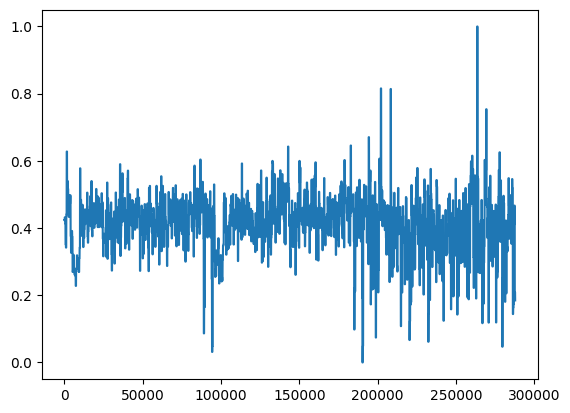

In [95]:
result['MMD_score_mean_scaled'].plot()

In [96]:
result['MMD_drift'].value_counts()

,count
MMD_drift,
pseudo_drift,276058
real_drift,11750


In [97]:
result

,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type,block,block_group,MMD_score_mean,MMD_score_mean_scaled,MMD_drift
0,0.000000,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.0,1015.130000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
1,1.000000,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.0,1015.630000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
2,2.000000,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.0,1015.940000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
3,3.000000,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.0,1016.410000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
4,4.000000,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.0,1016.510000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287803,96989.843603,71.054046,-11.993603,1.188583,-39.579661,995.843137,-10.659012,0.0,943.223923,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift
287804,97134.897290,128.908824,4.067313,-0.541777,-0.508416,1203.624739,-2.834831,0.0,964.107924,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift
287805,96414.990195,74.376323,-21.310109,2.489654,-30.233793,812.639806,9.637774,0.0,1005.043911,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift
287806,97036.439084,63.250709,-28.784773,1.394917,-24.039963,692.365787,-13.418267,0.0,974.309255,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift


In [98]:
def majority_drift(series):
    counts = series.value_counts()
    return counts.idxmax() if not counts.empty else "NO_DATA"
# Step 3: Aggregate per block_group
agg_results = result.groupby("block_group").agg({
    "MMD_drift": majority_drift
}).reset_index()
agg_results["block_range"] = agg_results["block_group"].apply(lambda g: f"{g*5}-{g*5+4}")
agg_results

,block_group,MMD_drift,block_range
0,0,pseudo_drift,0-4
1,1,pseudo_drift,5-9
2,2,pseudo_drift,10-14
3,3,pseudo_drift,15-19
4,4,pseudo_drift,20-24
...,...,...,...
1147,1147,pseudo_drift,5735-5739
1148,1148,pseudo_drift,5740-5744
1149,1149,pseudo_drift,5745-5749
1150,1150,pseudo_drift,5750-5754


In [99]:
agg_results["MMD_drift"] = agg_results["MMD_drift"].replace("pseudo_drift", "PSEUDO_DRIFT")
agg_results["MMD_drift"] = agg_results["MMD_drift"].replace("real_drift", "REAL_DRIFT")

In [100]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = agg_results["MMD_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.7847222222222222
F1 Score: 0.7227023128286756
Precision: 0.7186139458511174
Recall: 0.7847222222222222
Confusion Matrix:
 [[885  28]
 [220  19]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.80      0.97      0.88       913
  REAL_DRIFT       0.40      0.08      0.13       239

    accuracy                           0.78      1152
   macro avg       0.60      0.52      0.50      1152
weighted avg       0.72      0.78      0.72      1152



**Visulaization**
---

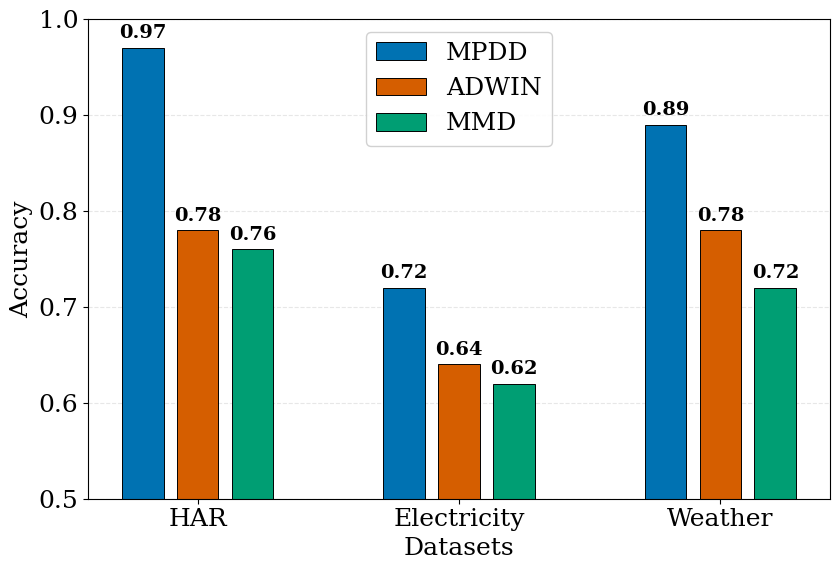

('drift_accuracy_grouped_bars.png', 'drift_accuracy_grouped_bars.pdf')

In [43]:
# Build a publication-ready grouped bar chart (ACM-style) from the table values.
# You can tweak all parameters in the CONFIG section below.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# =====================
# CONFIG (tune freely)
# =====================
datasets = ["HAR", "Electricity", "Weather"]  # x-axis labels
methods = ["MPDD", "ADWIN", "MMD"]            # bars per group

# Accuracies read from your table image (per dataset, per method)
# Order: datasets x methods
accuracies = np.array([
    [0.97, 0.78, 0.76],  # HAR
    [0.72, 0.64, 0.62],  # Electricity
    [0.89, 0.78, 0.72],  # Weather
])

# Appearance & layout
fig_size = (8.5, 5.8)        # inches
bar_width = 0.16
bar_gap = 0.05               # extra spacing between method bars
y_min, y_max = 0.5, 1.0      # y-limits for accuracy
grid_alpha = 0.3

# Fonts (ACM-like: serif). If "Times New Roman" isn't available,
# matplotlib will fall back to a similar serif family.
matplotlib.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
})

title_text = ""
x_label = "Datasets"
y_label = "Accuracy"

title_size = 16
label_size = 18
tick_size = 18
legend_size = 18


colors = {
    "MPDD": "#0072B2",   # Blue
    "ADWIN": "#D55E00",  # Vermillion/Orange
    "MMD": "#009E73",    # Bluish Green
}
# Output paths
png_path = "drift_accuracy_grouped_bars.png"
pdf_path = "drift_accuracy_grouped_bars.pdf"

# =====================
# PLOT
# =====================
fig, ax = plt.subplots(figsize=fig_size)

n_groups = len(datasets)
x = np.arange(n_groups)

# Compute bar offsets for centered grouping
n_methods = len(methods)
total_bar_span = n_methods * bar_width + (n_methods - 1) * bar_gap
start = - total_bar_span / 2 + bar_width / 2
offsets = [start + i * (bar_width + bar_gap) for i in range(n_methods)]

bars = []
for m_idx, method in enumerate(methods):
    vals = accuracies[:, m_idx]
    bar = ax.bar(x + offsets[m_idx], vals, width=bar_width, label=method, edgecolor="black", linewidth=0.7, color=colors[method])
    bars.append(bar)

# Labels and ticks
ax.set_title(title_text, fontsize=title_size, fontweight="bold")
ax.set_xlabel(x_label, fontsize=label_size)
ax.set_ylabel(y_label, fontsize=label_size)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=tick_size)
ax.tick_params(axis="y", labelsize=tick_size)

# Axes limits & grid
ax.set_ylim(y_min, y_max)
ax.yaxis.grid(True, linestyle="--", alpha=grid_alpha)
ax.set_axisbelow(True)

# Legend
leg = ax.legend(frameon=True, fontsize=legend_size)
leg.get_frame().set_alpha(0.9)

# Optional: annotate bars with values
for group in bars:
    for rect in group:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=14, fontweight="bold")

fig.tight_layout()
fig.savefig(png_path, dpi=400, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
plt.show()

png_path, pdf_path


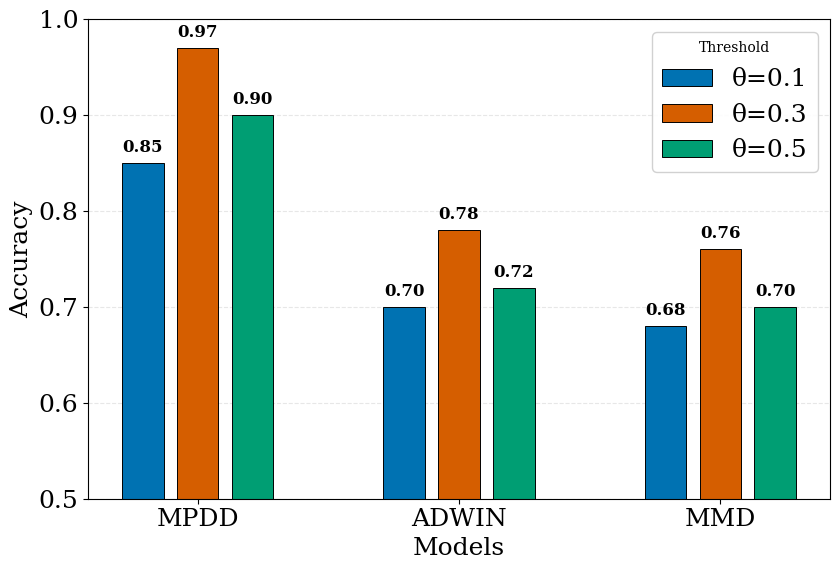

('threshold_accuracy_grouped_bars.png', 'threshold_accuracy_grouped_bars.pdf')

In [44]:
# Build a publication-ready grouped bar chart (ACM-style) for threshold comparison
# Following the same layout and style as your dataset-based chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# =====================
# CONFIG (tune freely)
# =====================
models = ["MPDD", "ADWIN", "MMD"]          # x-axis labels
thresholds = ["θ=0.1", "θ=0.3", "θ=0.5"]   # bars per group

# Accuracies for each threshold across models
accuracies = np.array([
    [0.85, 0.97, 0.90],  # MPDD
    [0.70, 0.78, 0.72],  # ADWIN
    [0.68, 0.76, 0.70],  # MMD
])

# Appearance & layout
fig_size = (8.5, 5.8)        # inches
bar_width = 0.16
bar_gap = 0.05
y_min, y_max = 0.5, 1.0
grid_alpha = 0.3

matplotlib.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
})

x_label = "Models"
y_label = "Accuracy"
title_text = ""

title_size = 16
label_size = 18
tick_size = 18
legend_size = 18

colors = {
    "θ=0.1": "#6A5ACD",  # slateblue
    "θ=0.3": "#2E8B57",  # sea green
    "θ=0.5": "#808080",  # gray
}

colors = {
    "θ=0.1": "#0072B2",   # Blue
    "θ=0.3": "#D55E00",  # Vermillion/Orange
    "θ=0.5": "#009E73",    # Bluish Green
}

# Output paths
png_path = "threshold_accuracy_grouped_bars.png"
pdf_path = "threshold_accuracy_grouped_bars.pdf"

# =====================
# PLOT
# =====================
fig, ax = plt.subplots(figsize=fig_size)

n_groups = len(models)
x = np.arange(n_groups)

# Compute bar offsets for centered grouping
n_thresh = len(thresholds)
total_bar_span = n_thresh * bar_width + (n_thresh - 1) * bar_gap
start = - total_bar_span / 2 + bar_width / 2
offsets = [start + i * (bar_width + bar_gap) for i in range(n_thresh)]

bars = []
for t_idx, t in enumerate(thresholds):
    vals = accuracies[:, t_idx]
    bar = ax.bar(x + offsets[t_idx], vals, width=bar_width,
                 label=t, edgecolor="black", linewidth=0.7,
                 color=colors[t])
    bars.append(bar)

# Labels and ticks
ax.set_title(title_text, fontsize=title_size, fontweight="bold")
ax.set_xlabel(x_label, fontsize=label_size)
ax.set_ylabel(y_label, fontsize=label_size)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=tick_size)
ax.tick_params(axis="y", labelsize=tick_size)

# Axes limits & grid
ax.set_ylim(y_min, y_max)
ax.yaxis.grid(True, linestyle="--", alpha=grid_alpha)
ax.set_axisbelow(True)

# Legend (move to upper-right inside the plot)
leg = ax.legend(frameon=True, fontsize=legend_size, title="Threshold")
leg.get_frame().set_alpha(0.9)

# Annotate bars with bold values slightly above the top
for group in bars:
    for rect in group:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontsize=12, fontweight="bold")

fig.tight_layout()
fig.savefig(png_path, dpi=400, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
plt.show()

png_path, pdf_path

